<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_03_%EA%B8%B0%EB%8C%80%EA%B0%92%EA%B3%BC_%EB%B6%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03. 기대값과 분산
---
* 날짜:
* 이름:

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}


In [ ]:
def E(X, P = []): # X, P는 넘파이 배열 
    # P를 따로 정의해 주지 않으면 가중치를 1/n
    if not len(P):
        P = np.array([1/len(X)])
    return np.sum(X*P)
    #넘파이 배열을 쓰면 브로드캐스팅으로 곱셈가능 

In [ ]:
X = np.array([1, 2])
E(X)

[0.5]


1.5

#### **예제 01. 공정한 주사위**



In [ ]:
X = np.arange(1,7)
E(X)

[0.16666667]


3.5

#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [ ]:
X = np.arange(1,7)
P = [1/9, 2/9, 1/9, 2/9, 1/9, 2/9]

E(X, P)

3.666666666666666

#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [ ]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

# E(X)
print(E(X))

#E(Y)
print(E(Y))

#E(c) == 4
print(E(c))

2.5
25.0
4.0


In [ ]:
# E(X+Y)
print(E(X+Y))

# E(X) + E(Y)  == E(X+Y)
print(E(X) + E(Y))

27.5
27.5


In [ ]:
#E(4X+3)
print(E(4*X+3))

#4E(X)+3  == E(4X + 3)
print(4*E(X)+3)

13.0
13.0


#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [ ]:
# 1
X_Korean= np.array([60,70,90,100])
X_Math = np.array([70,30,50,50])

E(X_Korean + X_Math)

130.0

In [ ]:
E(X_Korean) + E(X_Math)

130.0

### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}


In [ ]:
def E(X, P = []): 
    if not len(P):
        P = np.array([1/len(X)])
    return np.sum(X*P)

def V(X, P=[]):
    if not len(P):
        P = np.array([1/len(X)]*len(X))
    return E(( X - E(X, P) )**2)

In [ ]:
##################################################
def E(X, P = []): 
    if not len(P):
        P = np.array([1/len(X)])
    return np.sum(X*P)

def V(X,P = []):
    return E(( X - E(X, P) )**2)
X = np.array([1,2,3])
P = np.array([0.1, 0.1, 0.8])
print(E(X), V(X)) # P가 똑같은 확률일 때
print(E(X, P), V(X,P)) # P가 다른 확률일 때

2.0 0.6666666666666666
2.7 1.156666666666667


In [ ]:
X = np.array([1,2,3])
P = np.array([0.1, 0.1, 0.8])
print(E(X), V(X)) # P가 똑같은 확률일 때
print(E(X, P), V(X,P)) # P가 다른 확률일 때

2.0 0.6666666666666666
2.7 1.156666666666667


In [ ]:
X = np.array([10,20,30,40])
P = np.array([1/10, 2/10, 3/10, 4/10])
E(X), E(X,P), V(X), V(X,P)

(25.0, 30.0, 125.0, 150.0)

#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [ ]:
X = np.array([0,1,2])
P= np.array([1/4,1/2,1/4])
print(E(X, P))
print(V(X, P))

1.0
0.6666666666666666


#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [ ]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])

print(V(X)) # V(X)

print(V(c)) # V(c) == 0

print(V(2*X)) # V(2X) 
print(4*V(X)) 

print(V(2*X - 2)) # V(2X -2)
print(V(2*X))

print(4 * V(X)) # 4 x V(X)
print(V(2*X))

6.666666666666666
0.0
26.666666666666664
26.666666666666664
26.666666666666664
26.666666666666664
26.666666666666664
26.666666666666664


#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


In [ ]:
X_Korean = np.array([60,70,90,100])
X_Math = np.array([70,30,50,50])
print(V(X_Korean))
print(V(X_Math))

print(V(5*X_Korean))
print(25*V(X_Korean))

250.0
200.0
6250.0
6250.0


### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}

In [ ]:
def E(X, P = []): 
    if not len(P):
        P = np.array([1/len(X)])
    return np.sum(X*P)

def V(X, P=[]):
    if not len(P):
        P = np.array([1/len(X)]*len(X))
    return E(( X - E(X, P) )**2)

def Cov(X, Y, P_X = [], P_Y = []):
    return E(   (X - E(X, P_X)) * (Y - E(Y, P_Y))    )

In [ ]:
# 함수 확인용
X = np.array([10,20,30,40])
Y = np.array([40,30,20,10])
Z = np.array([10,20,10,20])
Cov(X,Y), Cov(X,Z)

(-125.0, 25.0)

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}




In [ ]:
def Cor(X, Y, P_X = [], P_Y = []):
    return Cov(X, Y, P_X, P_Y)  /  np.sqrt( V(X, P_X) * V(X, P_Y) )

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y - [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [ ]:
X = np.array([0,1,2])
P_X = np.array([1/5, 2/5, 2/5])
Y = np.array([0, 1, 2])
P_Y = np.array([1/5, 3/5, 1/5])

print(Cov(X, Y, P_X, P_Y))
print(Cor(X, Y, P_X, P_Y))

0.6666666666666666
0.9712858623572641


#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


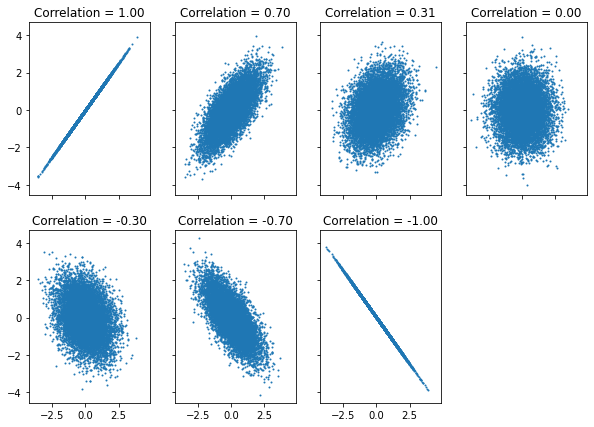

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (10,7), sharex = True, sharey = True)
axes = axes.flatten()
for i, a in enumerate([1, 0.7, 0.3, 0.01, -0.3, -0.7, -1]):
    x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
    axes[i].scatter(x, y, s = 1)
    axes[i].set_title('Correlation = %0.2f' % Cor(x,y))
plt.delaxes(axes[7])

#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


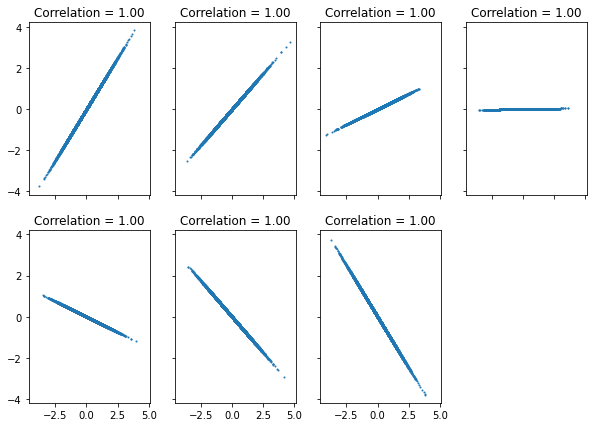

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (10, 7), sharex = True, sharey = True)

axes = axes.flatten()
for i, j in enumerate([1, 0.7, 0.3, 0.01, -0.3, -0.7, -1]):
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
    axes[i].scatter(x, y * j, s = 1)
    axes[i].set_title('Correlation = %0.2f' % Cor(x,y))
plt.delaxes(axes[7])
